<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Algorithmic_Trading_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-ad4e1f24716f>:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['Signal'][short_window:] = np.where(
<ipython-input-1-ad4e1f24716f>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

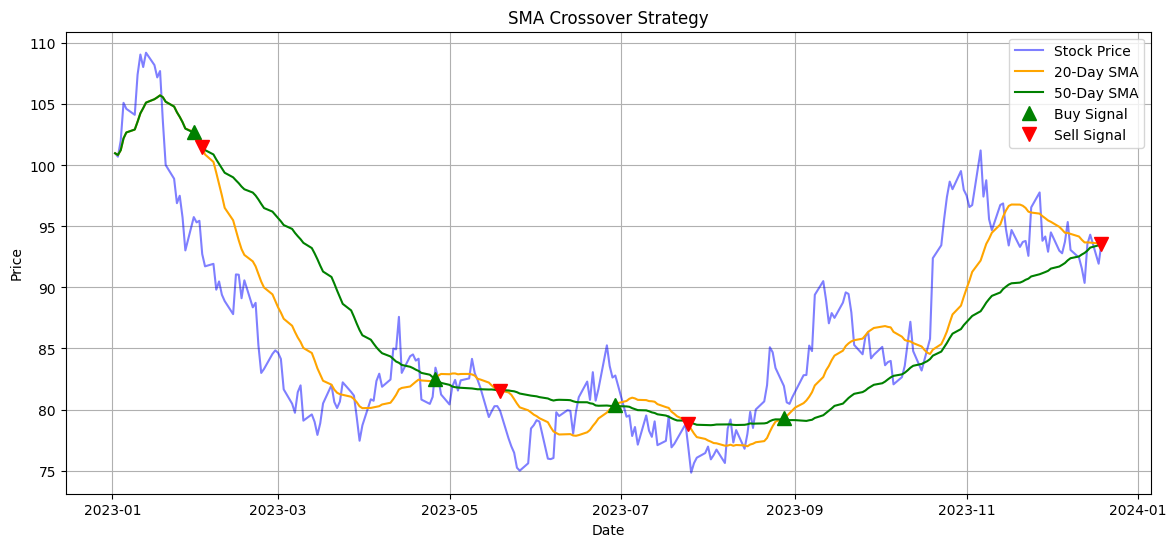

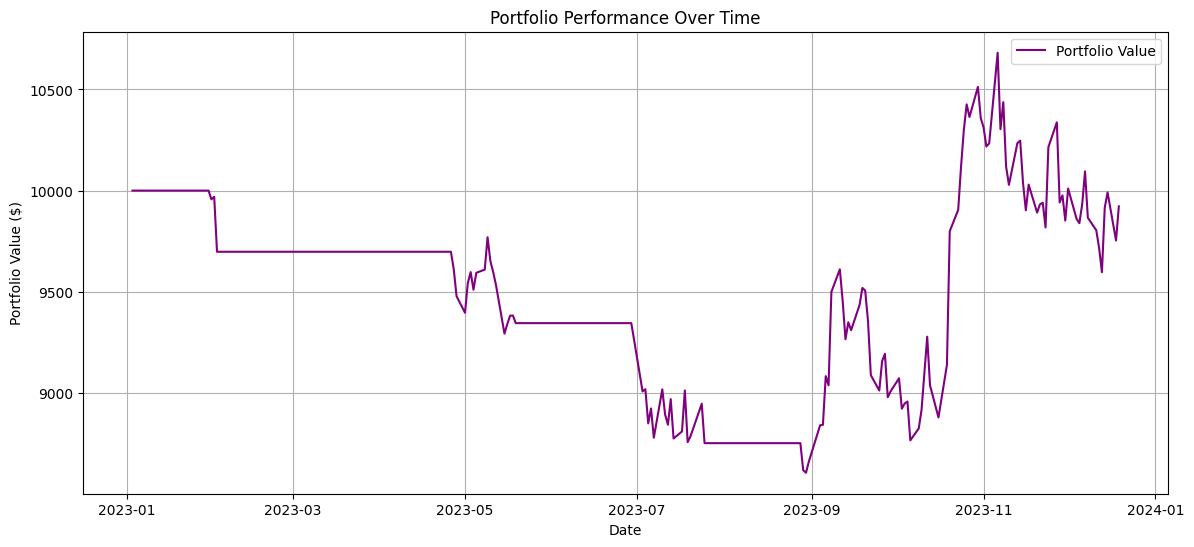

Algorithmic Trading Strategy Performance:
Cumulative Return: -0.78%
Annualized Return: 1.10%
Annualized Volatility: 19.57%
Sharpe Ratio: 0.06


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Simulate Stock Price Data
np.random.seed(42)  # For reproducibility

# Parameters for price simulation
num_days = 252  # Simulate 1 year of trading days (252 trading days)
initial_price = 100
daily_volatility = 0.02

# Generate synthetic daily returns and cumulative prices
daily_returns = np.random.normal(0, daily_volatility, num_days)
price = initial_price * (1 + daily_returns).cumprod()

# Create a DataFrame for stock data
dates = pd.date_range(start="2023-01-01", periods=num_days, freq="B")  # Business days
stock_data = pd.DataFrame({'Date': dates, 'Price': price})
stock_data.set_index('Date', inplace=True)

# Step 2: Implement SMA Crossover Strategy
# Calculate short and long moving averages
short_window = 20  # 20-day SMA
long_window = 50  # 50-day SMA
stock_data['SMA20'] = stock_data['Price'].rolling(window=short_window, min_periods=1).mean()
stock_data['SMA50'] = stock_data['Price'].rolling(window=long_window, min_periods=1).mean()

# Step 3: Generate Trading Signals
# Buy signal when SMA20 crosses above SMA50; sell signal when SMA20 crosses below SMA50
stock_data['Signal'] = 0
stock_data['Signal'][short_window:] = np.where(
    stock_data['SMA20'][short_window:] > stock_data['SMA50'][short_window:], 1, 0
)
stock_data['Position'] = stock_data['Signal'].diff()  # Track buy/sell signals

# Step 4: Simulate Portfolio Performance
initial_capital = 10000  # Initial investment amount
shares = 100  # Number of shares to trade per signal

# Initialize portfolio
portfolio = pd.DataFrame(index=stock_data.index)
portfolio['Holdings'] = shares * stock_data['Price'] * stock_data['Signal']
portfolio['Cash'] = initial_capital - (stock_data['Position'] * shares * stock_data['Price']).cumsum()
portfolio['Total'] = portfolio['Holdings'] + portfolio['Cash']
portfolio['Returns'] = portfolio['Total'].pct_change()

# Step 5: Calculate Strategy Performance Metrics
cumulative_return = (portfolio['Total'][-1] / initial_capital) - 1
annualized_return = portfolio['Returns'].mean() * 252
annualized_volatility = portfolio['Returns'].std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

# Step 6: Plot Trading Strategy and Portfolio Performance
plt.figure(figsize=(14, 6))
plt.plot(stock_data['Price'], label='Stock Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA20'], label='20-Day SMA', color='orange')
plt.plot(stock_data['SMA50'], label='50-Day SMA', color='green')
plt.plot(stock_data[stock_data['Position'] == 1].index,
         stock_data['SMA20'][stock_data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(stock_data[stock_data['Position'] == -1].index,
         stock_data['SMA20'][stock_data['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('SMA Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(portfolio['Total'], label='Portfolio Value', color='purple')
plt.title('Portfolio Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid()
plt.show()

# Step 7: Print Strategy Performance Metrics
print("Algorithmic Trading Strategy Performance:")
print(f"Cumulative Return: {cumulative_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
